In [1]:
import pandas as pd
from pathlib import Path
from maize.core.workflow import Workflow
from maize.steps.io import LoadData, LogResult, Return
 
from maize.steps.mai.docking.adv import Vina
from maize.steps.mai.molecule import Gypsum
from maize.utilities.chem import IsomerCollection
import os, sys
os.environ['XDG_CONFIG_HOME'] = '/home/iwatobipen/dev/CBI/cheminfo_tutorial_20241028/data/'
flow = Workflow(name='dock', level='info', cleanup_temp=False)

In [2]:
flow.config.update(Path("../data/maize.toml"))

load = flow.add(LoadData[list[str]])
#void = flow.add(Void)
# 3D conf gen and protonate
embe = flow.add(Gypsum)
# run vina docking
dock = flow.add(Vina)
# receive docke results
retu = flow.add(Return[list[IsomerCollection]])

In [3]:
df = pd.read_csv('./TL_sampling.csv')
print(df.shape)
df.head(2)


(26, 2)


,SMILES,NLL
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCC2(C...,3.15
1,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,3.15


In [4]:
smiles_lst = [row['SMILES'] for idx, row in df.iterrows()]
# used first
smiles_lst = [s for s in smiles_lst][:5]

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

In [6]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles_lst]

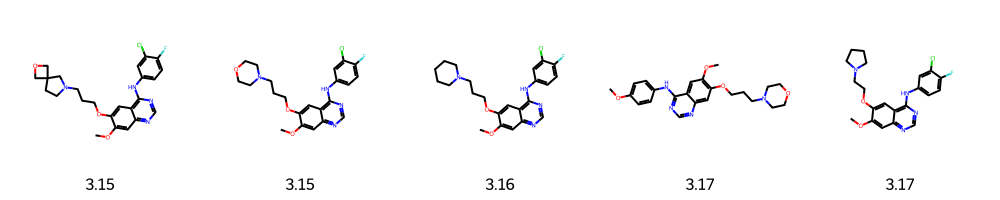

In [7]:
Draw.MolsToGridImage(mols, legends=[str(nll) for nll in df.NLL], molsPerRow=5)

In [8]:
load.data.set(smiles_lst)
embe.n_variants.set(2)
# RIP3K <https://www.rcsb.org/structure/7MON>
dock.receptor.set(Path('/home/iwatobipen/dev/CBI/cheminfo_tutorial_20241028/data/2ito_fix_remh.pdbqt'))
dock.search_center.set((-56.643,  -6.844, -23.487))
dock.search_range.set((20.00, 20.00, 20.00))
dock.exhaustiveness.set(16)

In [9]:
flow.connect(load.out, embe.inp)
flow.connect(embe.out, dock.inp)
flow.connect(dock.out,retu.inp)
flow.check()

In [10]:
flow.execute()

2024-10-11 10:45:17,958 |     INFO |             dock | 
              ___           ___                       ___           ___
             /\__\         /\  \          ___        /\  \         /\  \
            /::|  |       /::\  \        /\  \       \:\  \       /::\  \
           /:|:|  |      /:/\:\  \       \:\  \       \:\  \     /:/\:\  \
          /:/|:|__|__   /::\~\:\  \      /::\__\       \:\  \   /::\~\:\  \
         /:/ |::::\__\ /:/\:\ \:\__\  __/:/\/__/ _______\:\__\ /:/\:\ \:\__\
         \/__/~~/:/  / \/__\:\/:/  / /\/:/  /    \::::::::/__/ \:\~\:\ \/__/
               /:/  /       \::/  /  \::/__/      \:\~~\~~      \:\ \:\__\
              /:/  /        /:/  /    \:\__\       \:\  \        \:\ \/__/
             /:/  /        /:/  /      \/__/        \:\__\        \:\__\
             \/__/         \/__/                     \/__/         \/__/


2024-10-11 10:45:17,959 |     INFO |             dock | Starting Maize version 0.8.3 (c) AstraZeneca 2024
2024-10-11 10:4

2024-10-11 10:45:24,546 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |             vina | WAITING_FOR_INPUT
                                   |         loaddata | COMPLETED
                                   |           gypsum | RUNNING
2024-10-11 10:45:24,538 |     INFO |           gypsum | Found failed SMILES file
2024-10-11 10:45:24,538 |     INFO |           gypsum | Failed SMILES:
'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCCC1'
2024-10-11 10:45:24,562 |  WARNING |           gypsum | Skipping failed embedding for SMILES 'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCCC1', falling back to RDKit
2024-10-11 10:45:24,678 |     INFO |             vina | Docking molecule 0: 'IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCC2(COC2)C1', n_isomers=2)'
2024-10-11 10:45:24,710 |     INFO |             vina | Docking molecule 1: 'IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)

2024-10-11 10:54:07,333 |     INFO |             vina | Job completed (1/9)


2024-10-11 10:55:29,279 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |             vina | WAITING_FOR_COMMAND
                                   |         loaddata | COMPLETED
                                   |           gypsum | COMPLETED


2024-10-11 10:57:58,640 |     INFO |             vina | Job completed (2/9)


2024-10-11 10:58:14,629 |     INFO |             vina | Job completed (3/9)
2024-10-11 10:58:17,148 |     INFO |             vina | Job completed (4/9)


2024-10-11 10:58:21,144 |     INFO |             vina | Job completed (5/9)


2024-10-11 10:58:23,523 |     INFO |             vina | Job completed (6/9)


2024-10-11 10:59:39,940 |     INFO |             vina | Job completed (7/9)


2024-10-11 11:00:34,256 |     INFO |             vina | Job completed (8/9)


2024-10-11 11:01:05,599 |     INFO |             vina | Job completed (9/9)
2024-10-11 11:01:05,622 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |             vina | RUNNING
                                   |         loaddata | COMPLETED
                                   |           gypsum | COMPLETED
2024-10-11 11:01:05,626 |     INFO |             vina | Parsing isomer 0: 'YXQNVWQALXLRKA-HQZXFEGTNA-O'
2024-10-11 11:01:05,634 |     INFO |             vina | Parsing isomer 1: 'XGALLCVXEZPNRQ-OUIVSUKHNA-P'
2024-10-11 11:01:05,641 |     INFO |             vina | Parsing isomer 2: 'XGALLCVXEZPNRQ-LELJVTLKNA-N'
2024-10-11 11:01:05,653 |     INFO |             vina | Parsing isomer 3: 'IFIRBZOPPUFQRQ-GZOYUMAFNA-P'
2024-10-11 11:01:05,661 |     INFO |             vina | Parsing isomer 4: 'IFIRBZOPPUFQRQ-GJWLQAPINA-P'
2024-10-11 11:01:05,668 |     INFO |             vina | Parsin

2024-10-11 11:01:06,189 |     INFO |             dock | Node 'vina' finished (4/4)
2024-10-11 11:01:06,691 |     INFO |             dock | Execution completed :) total runtime: 0:15:48.160372
	4 nodes completed successfully
	0 nodes stopped due to closing ports
	0 nodes failed
	0:31:41.755963 total walltime
	0:15:55.044389 spent waiting for resources or other nodes


In [14]:
#!mkdir dock_res

In [15]:
res=retu.get()
import numpy as np
from pathlib import Path
for idx, m in enumerate(res):
    if type(m.scores['free_energy'])==np.float64:
        m.to_sdf(Path(f'./dock_res/ok_{idx}.sdf'))
    else:
        # docking failed compounds don't have score.
        m.molecules[0].to_sdf(Path(f'./dock_res/ng_{idx}.sdf'))

In [13]:
res[0].molecules[0].

SyntaxError: invalid syntax (3490686156.py, line 1)

In [46]:
res

[IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCC2(COC2)C1', n_isomers=2, free_energy=-8.5790),
 IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1', n_isomers=2, free_energy=-8.2160),
 IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCCCC1', n_isomers=1, free_energy=-8.2330),
 IsomerCollection('COc1ccc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)cc23)cc1', n_isomers=1, free_energy=-7.3070),
 IsomerCollection('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCCC1', n_isomers=2, free_energy=-8.0120)]